**Project - SUV PREDICTIONS**

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math

In [19]:
dataset =pd.read_csv("suv_data.csv")

In [21]:
dataset.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [23]:
len(dataset.index)

400

**ANALYSE THE DATA**

<Axes: xlabel='Purchased', ylabel='count'>

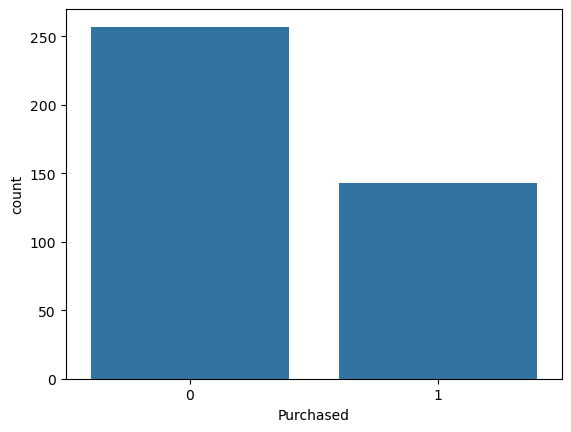

In [28]:
sns.countplot(x ="Purchased", data=dataset)

<Axes: xlabel='Purchased', ylabel='count'>

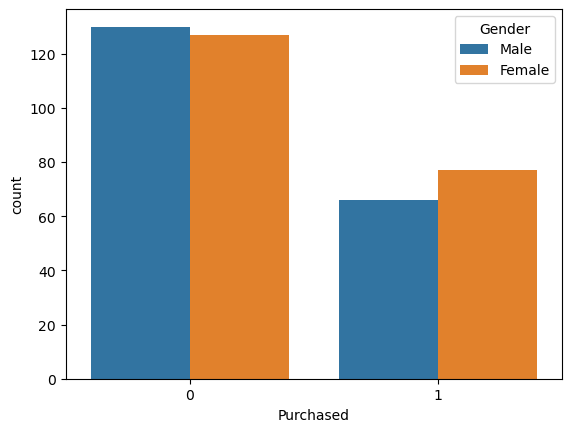

In [30]:
sns.countplot(x="Purchased", hue ="Gender", data=dataset)

<Axes: xlabel='Purchased', ylabel='count'>

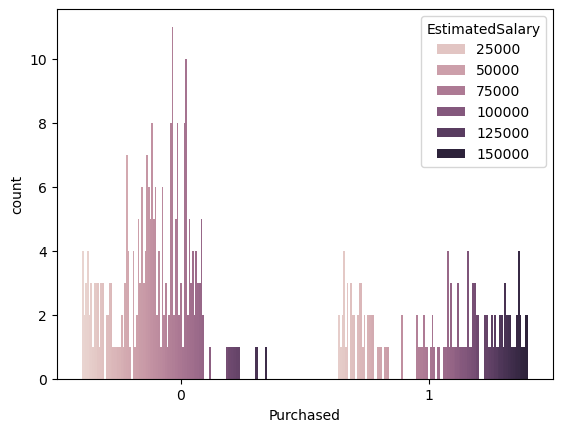

In [32]:
sns.countplot(x ="Purchased", hue ="EstimatedSalary", data =dataset)

<Axes: ylabel='Frequency'>

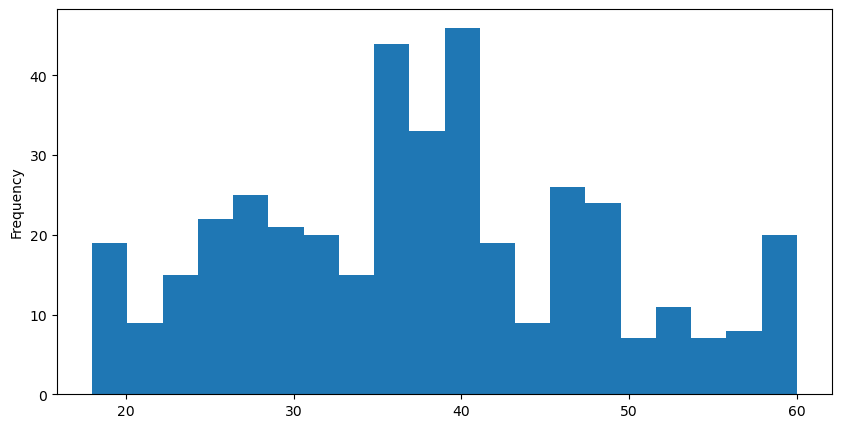

In [36]:
dataset["Age"].plot.hist(bins =20, figsize=(10,5))

In [38]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


**DATA WRANGLING**

In [41]:
dataset.isnull()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
395,False,False,False,False,False
396,False,False,False,False,False
397,False,False,False,False,False
398,False,False,False,False,False


In [43]:
dataset.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

**TRAIN AND TEST DATA**

In [46]:
#define independent variable:
X =dataset.iloc[:,[2,3]].values
y=dataset.iloc[:,4].values

In [50]:
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [52]:
#to bring independent & dependent variable:
from sklearn.model_selection import train_test_split

In [58]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=0)

In [64]:
#scalar the input values:
from sklearn.preprocessing import StandardScaler

In [67]:
#Training Dataset:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test =sc.transform(X_test)

In [69]:
#import logistic regression:
from sklearn.linear_model import LogisticRegression

In [71]:
classifier = LogisticRegression (random_state = 0)

In [73]:
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [75]:
#predict the value:
y_pred = classifier.predict(X_test)

In [77]:
from sklearn.metrics import confusion_matrix

In [81]:
confusion_matrix(y_test, y_pred)

array([[65,  3],
       [ 8, 24]], dtype=int64)

**ACCURACY**

In [84]:
from sklearn.metrics import accuracy_score

In [86]:
accuracy_score(y_test, y_pred)

0.89

In [88]:
#for in percentage %:
accuracy_score(y_test, y_pred)*100

89.0

**END**